In [27]:
%matplotlib inline

In [28]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import datetime
import pytz
import matplotlib.pyplot as plt
from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame

In [29]:
G = nx.read_graphml("2015-08-21T00:00:00Z_1d_allCams_0.99conf_160dist_6ilen.graphml")

In [30]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1202
Number of edges: 152449
Average degree: 253.6589


# Closeness VS RGG

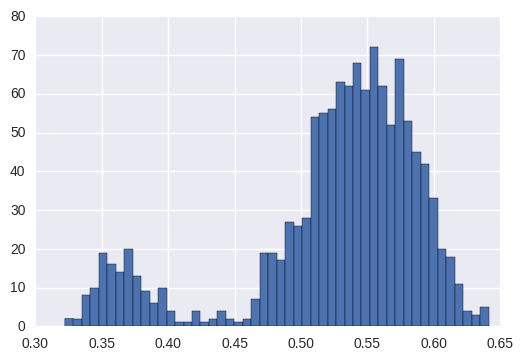

In [31]:
closenessc = nx.closeness.closeness_centrality(G)
Series(closenessc).hist(bins=50)

In [9]:
rgg = nx.random_geometric_graph(len(G.nodes()), 0.053)

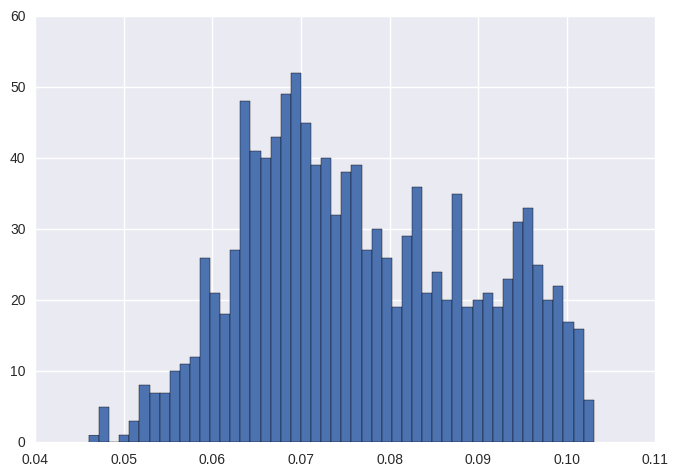

In [10]:
rgg_closenessc = nx.closeness.closeness_centrality(rgg)
Series(rgg_closenessc).hist(bins=50)

In [11]:
160*100/3000

5.333333333333333

# Grenze bei 0.45

In [32]:
line = 0.45

In [33]:
s = Series(closenessc)

In [34]:
smaller = s[s < line]

In [35]:
bigger = s[s > line]

In [36]:
len(smaller)

148

In [37]:
len(bigger)

1054

In [38]:
IDsmaller = [int(i) for i in smaller.index]

In [39]:
IDbigger = [int(i) for i in bigger.index] 

# Positionsdaten pro Biene rausfischen

Das sollte mal eine vernünftige Funktion werden, weil brauche ich ständig.

In [40]:
confidence = 0.99

In [41]:
repo = Repository("/storage/mi/aschle/days")

In [42]:
# Begin und End festlegen 2015-08-21T00:00:00Z 1day
start = "2015-08-21T00:00:00Z" 
start_dt = datetime.datetime.strptime(start, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
start_ts = start_dt.timestamp()

In [43]:
end_dt = start_dt + datetime.timedelta(hours=24)
end_ts = end_dt.timestamp()

In [44]:
def getPositions(repo, begin_ts, end_ts, camid, idlist, confidence):
    files = list(repo.iter_fnames(begin=begin_ts, end=end_ts, cam=camid))
    print(len(files))
    df_list = []
    
    for f in files[:2]:
        print(f)
        fc = load_frame_container(f)
        df = prep.get_dataframe2(fc)
        df = prep.calcIds(df,confidence)
        df = filterIDs(df, idlist)
        df_list.append(df)
    
    positions = pd.concat(df_list)
    return positions

In [45]:
def filterIDs(df, idlist):  
    filtered = df.loc[df['id'].isin(idlist)]
    filtered = filtered.loc[:,['xpos','ypos', 'id']]
    return filtered

In [46]:
plotsmall = getPositions(repo, start_ts, end_ts, 0, IDsmaller, confidence)

254
/storage/mi/aschle/days/2015/08/21/00/00/Cam_0_2015-08-21T00:00:06.592685Z--2015-08-21T00:05:47.610190Z.bbb
/storage/mi/aschle/days/2015/08/21/00/00/Cam_0_2015-08-21T00:05:47.943209Z--2015-08-21T00:11:28.960715Z.bbb


In [47]:
plotbigger = getPositions(repo, start_ts, end_ts, 0, IDbigger, confidence)

254
/storage/mi/aschle/days/2015/08/21/00/00/Cam_0_2015-08-21T00:00:06.592685Z--2015-08-21T00:05:47.610190Z.bbb
/storage/mi/aschle/days/2015/08/21/00/00/Cam_0_2015-08-21T00:05:47.943209Z--2015-08-21T00:11:28.960715Z.bbb


In [ ]:
# sample0b = plotbigger.sample(frac=0.1)
sns.distplot(plotsmall.xpos);

In [65]:
sample0 = plotsmall.sample(frac=0.1)
sample0.plot.scatter(x='xpos', y='ypos', alpha=0.1, s=2)

In [ ]:
sample0

In [ ]:

#sample0b.plot.scatter(x='xpos', y='ypos', alpha=0.1, s=2)

In [52]:
plotbigger.shape

(21331746, 3)

In [ ]:
plotsmall_3 = getPositions(repo, start_ts, end_ts, 3, IDsmaller, confidence)
plotbigger_3 = getPositions(repo, start_ts, end_ts, 3, IDbigger, confidence)

In [ ]:
plotsmall_1 = getPositions(repo, start_ts, end_ts, 1, IDsmaller, confidence)
plotbigger_1 = getPositions(repo, start_ts, end_ts, 1, IDbigger, confidence)

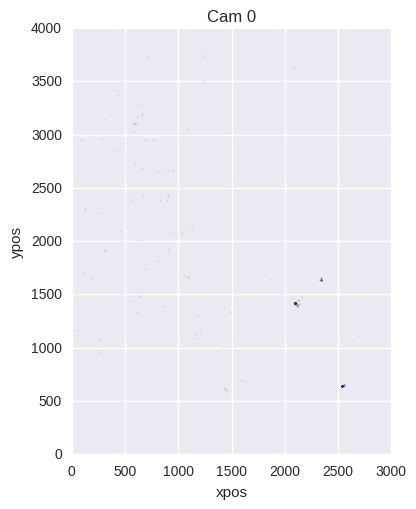

In [40]:
plotsmall.plot.scatter(x='xpos', y='ypos', title="Cam 0", s=1,xlim=(0,3000),ylim=(0,4000), alpha=0.1)
plt.axes().set_aspect('equal')

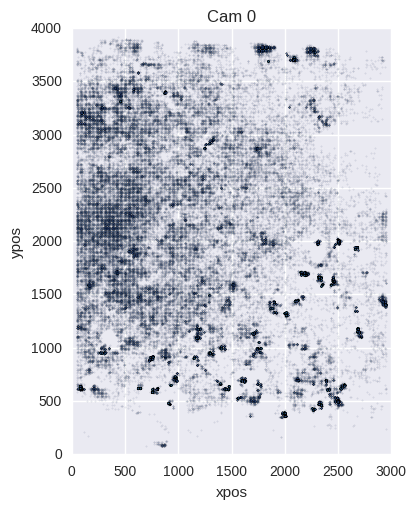

In [42]:
plotbigger.plot.scatter(x='xpos', y='ypos', title="Cam 0", s=1,xlim=(0,3000),ylim=(0,4000), alpha=0.1)
plt.axes().set_aspect('equal')